In [1]:
from econometron.Models.dynamicsge import linear_dsge

In [2]:
equations = [
    "-C_t**(-sigma) + beta * C_tp1**(-sigma) * (alpha * A_tp1 * K_tp1**(alpha-1) + 1 - delta) = 0",  # Euler equation
    "C_t + K_tp1 - A_t * K_t**alpha - (1 - delta) * K_t = 0",  # Capital accumulation
    "-log(A_tp1) + rho_a * log(A_t) + epsilon = 0",  # Technology shock process
]

In [3]:
variables = ['A','K','C']  # Technology, Capital, Consumption
states = ['A','K']         # State variables: Technology and Capital
exo_states = ['A']         # Exogenous state: Technology
endo_states = ['K']        # Endogenous state: Capital
shocks = ['epsilon']       # Technology shock
parameters = {
    'sigma': 1.5,    # Risk aversion
    'beta': 0.99,    # Discount factor
    'alpha': 0.35,   # Capital share
    'delta': 0.025,  # Depreciation rate
    'rho_a': 0.9,    # Technology persistence
    'epsilon':0.01   # Std. dev. of technology shock
}

In [4]:
initial_guess = [1,1]

In [5]:
RBC = linear_dsge(
    equations=equations,
    variables=variables,
    exo_states=exo_states,
    endo_states=endo_states,
    shocks=shocks,
    parameters=parameters,
)

In [6]:
RBC.set_initial_guess(initial_guess)
RBC.normalize={'A':1}
RBC.compute_ss(guess=initial_guess, method='fsolve', options={'xtol': 1e-8})

Steady-state residuals: [-1.77851329e-13  9.03721542e-14 -1.00000000e-02]


A     1.000000
K    34.398226
C     2.589794
dtype: float64

In [7]:
RBC._Analytical_jacobians(debug=True)

Ordered variables: ['A', 'K', 'C']
Substitution dictionary: {A_t: 1.0, A_tp1: 1.0, A_tm1: 1.0, K_t: 34.39822605103811, K_tp1: 34.39822605103811, K_tm1: 34.39822605103811, C_t: 2.58979429186702, C_tp1: 2.58979429186702, C_tm1: 2.58979429186702, epsilon: 0.01, epsilon_t: 0.0, sigma: 1.5, beta: 0.99, alpha: 0.35, delta: 0.025, rho_a: 0.9}

Processing equation 0: -C_t**(-sigma) + beta * C_tp1**(-sigma) * (alpha * A_tp1 * K_tp1**(alpha-1) + 1 - delta) = 0
  tp1_terms: -A_tp1*K_tp1**(alpha - 1)*alpha*beta/C_tp1**sigma + beta*delta/C_tp1**sigma - beta/C_tp1**sigma
  t_terms: -1/C_t**sigma
  shock_terms: 0

Processing equation 1: C_t + K_tp1 - A_t * K_t**alpha - (1 - delta) * K_t = 0
  tp1_terms: -K_tp1
  t_terms: -A_t*K_t**alpha + C_t + K_t*delta - K_t
  shock_terms: 0

Processing equation 2: -log(A_tp1) + rho_a * log(A_t) + epsilon = 0
  tp1_terms: log(A_tp1)
  t_terms: rho_a*log(A_t)
  shock_terms: epsilon
Equation to variable mapping: {0: 'A', 1: 'K', 2: 'C'}
Reordering index: [0, 1, 2]
An

(array([[-8.33790428e-03,  1.57555735e-04,  1.38972249e-01],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.        ,  0.        ,  0.13897225],
        [-3.44974994, -1.01010101,  1.        ],
        [ 0.9       ,  0.        ,  0.        ]]),
 array([[0.],
        [0.],
        [1.]]))

In [8]:
RBC.approximate()

(array([[-8.33790428e-03,  1.57555735e-04,  1.38972249e-01],
        [ 0.00000000e+00, -1.00000000e+00,  0.00000000e+00],
        [ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00]]),
 array([[ 0.        ,  0.        ,  0.13897225],
        [-3.44974994, -1.01010101,  1.        ],
        [ 0.9       ,  0.        ,  0.        ]]),
 array([[0.],
        [0.],
        [1.]]))

In [9]:
RBC.solve_RE_model()
print("Policy Function (f):\n", RBC.f)
print("State Transition (p):\n", RBC.p)

Policy Function (f):
 [[0.59492193 0.03861978]]
State Transition (p):
 [[0.9        0.        ]
 [2.85482802 0.97148123]]


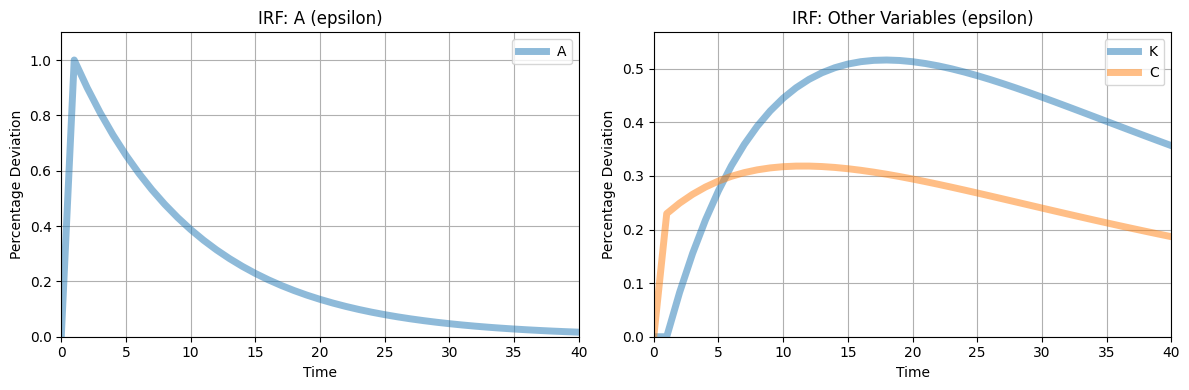

In [10]:
RBC.plot_irfs()

In [11]:
import numpy as np
RBC.simulate(T=51, drop_first=10, covariance_matrix=np.array([[0.01**2]]))

,epsilon_t,A_t,K_t,C_t
0,-0.000490,0.008993,0.012128,0.008287
1,0.003184,0.011278,0.012529,0.009017
2,0.008467,0.018617,0.013107,0.011000
3,0.017451,0.034206,0.014279,0.015182
4,-0.007090,0.023696,0.016710,0.014015
5,0.006313,0.027639,0.018200,0.015685
6,0.019465,0.044340,0.019975,0.020432
7,0.004734,0.044640,0.023085,0.022096
8,0.015623,0.055799,0.026132,0.026222
9,0.003339,0.053558,0.030018,0.027701


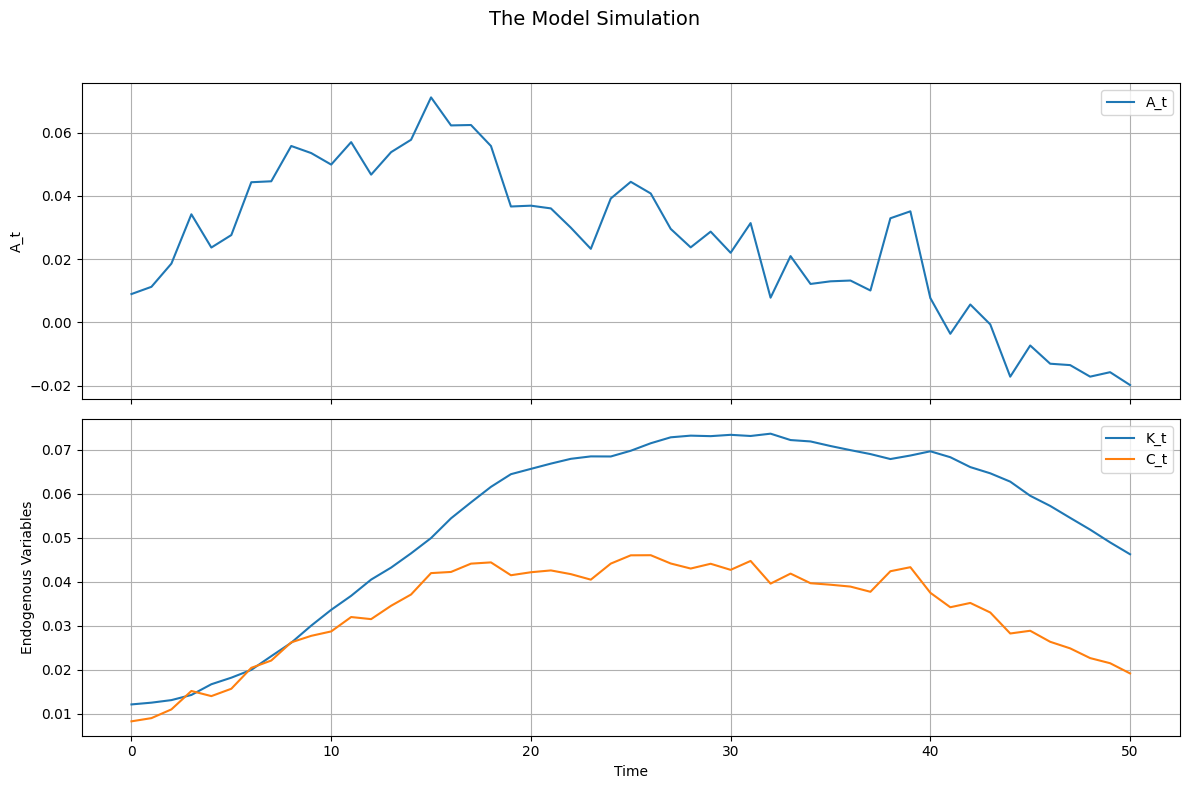

In [12]:
RBC.simulations()